In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df=pd.read_csv("./Dataset2_Anime.csv")

In [2]:
df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",6-Jan-17,1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...",21-Dec-02,1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


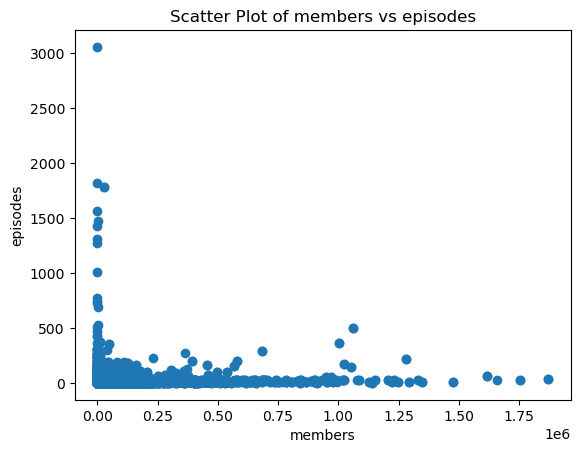

In [4]:
# Scatter plot:
column_x = 'members'
column_y = 'episodes'

plt.scatter(df[column_x], df[column_y])

plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Scatter Plot of {} vs {}'.format(column_x, column_y))

plt.show()

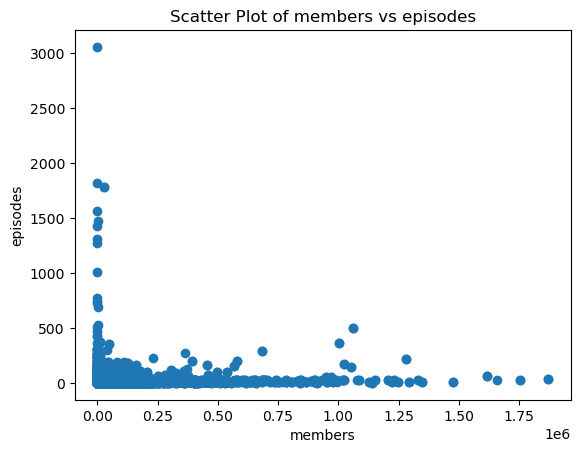

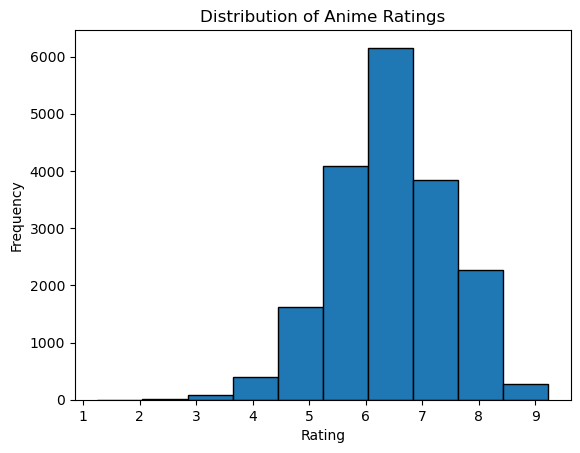

In [6]:
# Histogram:
ratings_column = 'score'

plt.hist(df[ratings_column], bins=10, edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Ratings')

plt.show()

In [ ]:
# # Heat map:
# columns_of_interest = ['ranked', 'score', 'genre']

# subset_df = df[columns_of_interest]

# unique_genres = df['genre'].explode().unique()

# heatmap_data = pd.pivot_table(subset_df, values='score', index='genre', columns='ranked', aggfunc='mean')
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

# plt.xlabel('Ranked')
# plt.ylabel('Genre')
# plt.title('Heatmap of Rank vs Rating within Different Categories')

# plt.show()

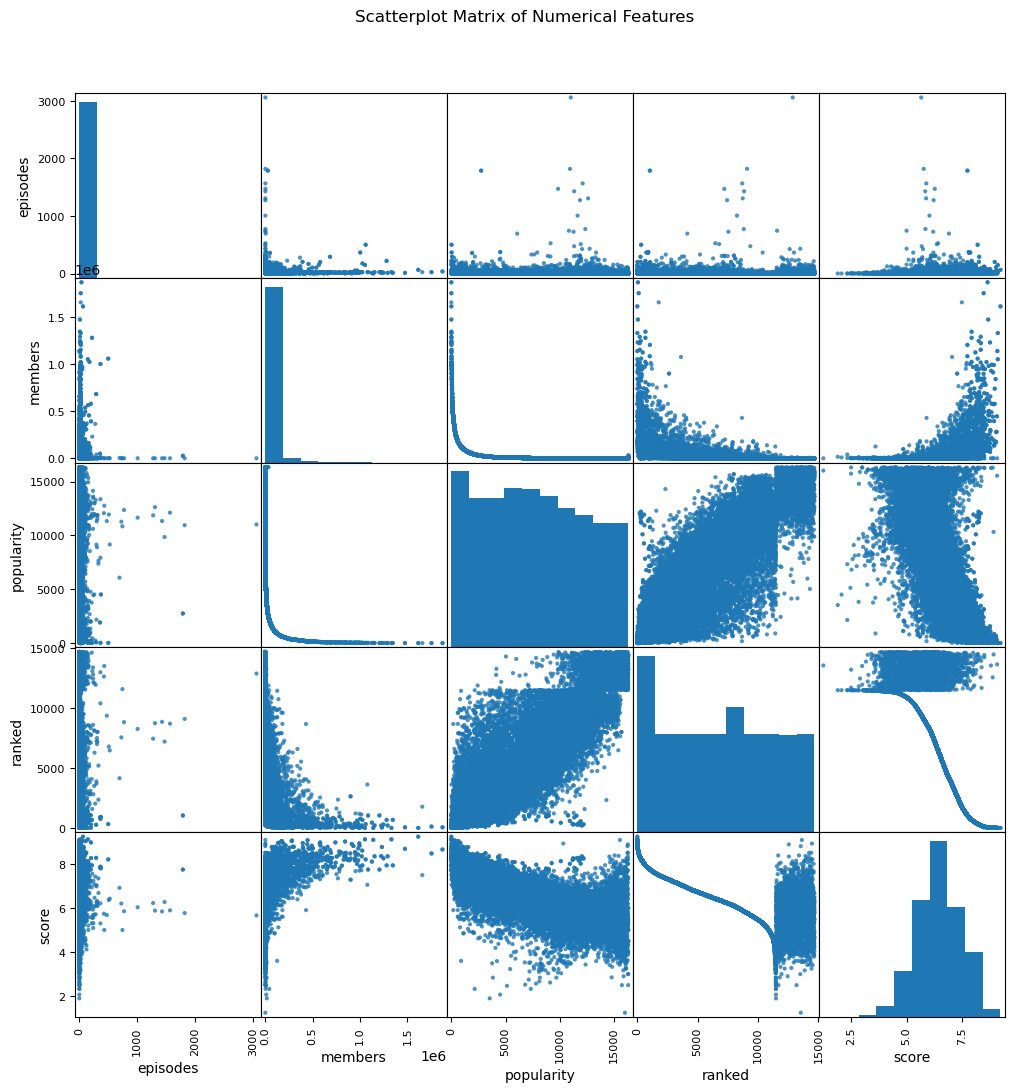

In [8]:
#Scatterplot matrix:
from pandas.plotting import scatter_matrix

numerical_columns = ['episodes', 'members', 'popularity', 'ranked', 'score']

scatter_matrix(df[numerical_columns], figsize=(12, 12), diagonal='hist', alpha=0.8)

plt.suptitle('Scatterplot Matrix of Numerical Features', y=0.95)
plt.show()

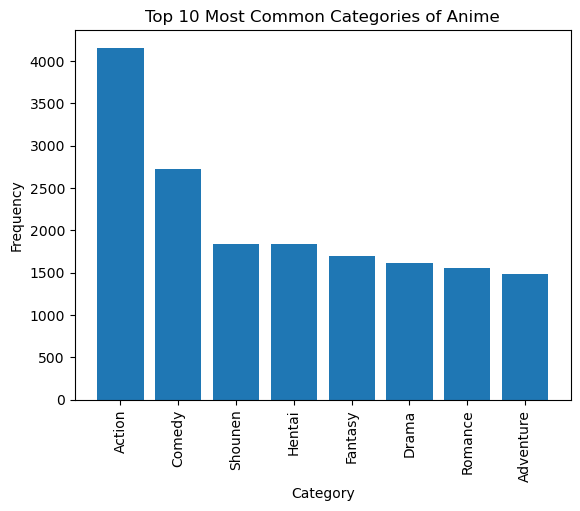

In [17]:
# bar Chart:
categories = df['genre'].str.split(',')

category_counts = {}
for category_list in categories:
    for category in category_list:
        category = category.strip().replace("'", "")
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

top_10_categories = sorted_categories[:10]

category_names = [category[0].strip("[]").replace("'", "").strip() for category in top_10_categories]
category_frequencies = [category[1] for category in top_10_categories]

plt.bar(category_names, category_frequencies)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Categories of Anime')
plt.xticks(rotation=90)
plt.show()

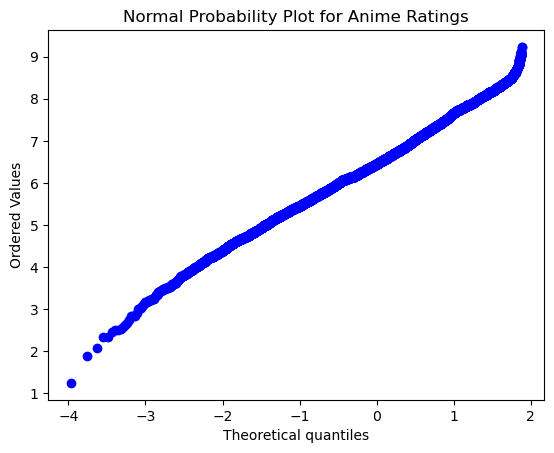

In [9]:
# Normal Probability Plot:
rating='score'
stats.probplot(df[rating], dist='norm', plot=plt)
plt.title('Normal Probability Plot for Anime Ratings')

# Show the plot
plt.show()

In [10]:
# T-Test:
genre_column = 'genre'

shonen_ratings = df[df[genre_column].str.contains('Shounen')][rating]
shojo_ratings = df[df[genre_column].str.contains('Shoujo')][rating]

t_stat, pval = stats.ttest_ind(shonen_ratings, shojo_ratings, equal_var=False)

alpha = 0.05

if pval < alpha:
    print("Reject the null hypothesis: There is a significant difference in ratings between shonen and shojo anime.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between shonen and shojo anime.")

Fail to reject the null hypothesis: There is no significant difference in ratings between shonen and shojo anime.


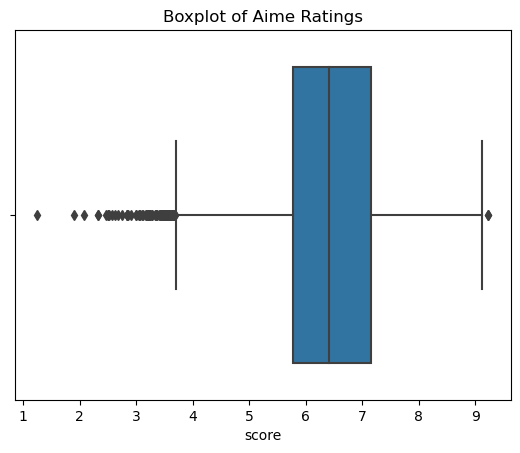

Outliers are:
3           Fullmetal Alchemist: Brotherhood
3057                            Tsui no Sora
3058            Joshidai: Ecchi Soudanshitsu
3080        Fullmetal Alchemist: Brotherhood
7564                                    Pupa
                        ...                 
13766    Undouki Kenshin Manual Taiou Taisou
13876                     Washimo 7th Season
14002                          TV ga Kita hi
14116                         Tonosama Gaeru
14299      Yans! Gans! Meat or Die Episode 0
Name: title, Length: 98, dtype: object


In [11]:
# Outlier Detection:
sns.boxplot(x=df[rating])
plt.title('Boxplot of Aime Ratings')
plt.show()

q1=df[rating].quantile(.25)
q3=df[rating].quantile(.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
outlier=df[(df[rating]<lb)|(df[rating]>ub)]
print('Outliers are:')
print(outlier['title'])

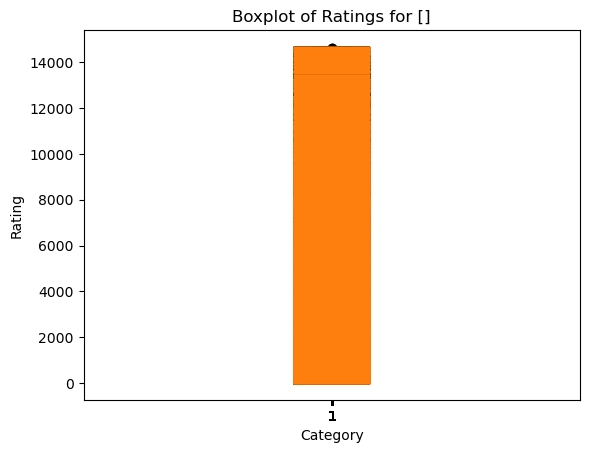

In [22]:


# Group the data by category
grouped_data = df.groupby('genre')

# Create a boxplot for each category
for category, data in grouped_data:
    
    ratings = data['ranked']
    
   
    plt.boxplot(ratings)
    
    
    plt.title(f'Boxplot of Ratings for {category}')
    plt.xlabel('Category')
    plt.ylabel('Rating')
    
   
plt.show()


C:\Users\Janvii RV\AppData\Local\Temp\ipykernel_7172\1119811489.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


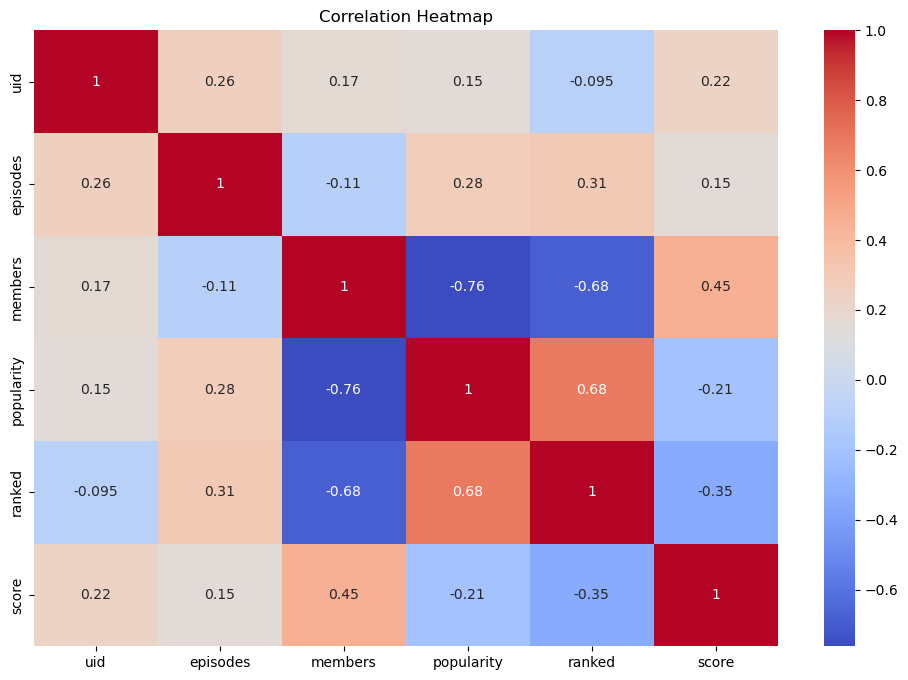

In [16]:
# Correlation Heatmap:

corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()